In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim                             # used to compute the derivative
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

from IPython.display import Markdown

# PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs ($x$) and outputs ($y$) of a model, as well as the model’s parameters (weights).

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. 

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html)

In [2]:
a = np.array([[1, 2], [3, 4]])
t1 = torch.tensor(a)                                    # converts the numpy array to a PyTorch Tensor
                                                        # will have the same datatype as the numpy array
t2 = torch.from_numpy(a)                                # converts the numpy array to a PyTorch Tensor
                                                        # the difference is this function shares the underlying memory between the 
                                                        # array & the tensor (changes in one will reflect in the other)
t3 = torch.tensor([[1, 2]])                             # create a tensor directly from a list
print(t3.dtype)
t4 = torch.tensor([[2, 3]], dtype = torch.float16)
print(t4.dtype)

t5 = torch.ones_like(t3)                                # creates a tensor w/ the same shape & data type as t3, but filled with 1s
print(t5)

torch.int64
torch.float16
tensor([[1, 1]])


## Pytorch AutoGrad

In [3]:
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x + 1
y.backward()
print(x.grad)       # gradient of y (x^2 + 3x + 1) w.r.t x at x=2
                    #     i.e., rate of change of y w.r.t. x at the pt 2

tensor([7.])


## Perceptron
Build a perceptron featuring three inputs and a single output. Initialize all weights ($𝑤_0$, $𝑤_2$, $𝑤_3$) to 1, considering a bias term. Take a training data point, 𝑥1=4, 𝑥2=-1, and 𝑦=1. Employ the backpropagation algorithm to demonstrate how this neural network evolves during the processing of the given training example. Set the learning rate (𝛼) to 0.5 and utilize the squared loss function.

In [4]:
# Here we are building the perceptron ourselves             Hypothesis Function --> h = w ^ T * x 
x = torch.tensor([1., 4., -2.])                             # one data pt with 3 features
y = torch.tensor([1.])                                      # one val representing the ground truth for the input 
w = torch.tensor([1., 1., 1.], requires_grad = True)        # computing the derivative w.r.t. w --> set requires_grad to True
h = torch.matmul(w, x)                                      # computing the dot product (predicted output) --> Step 1: Forward Pass
print(f'Forward Pass, h = {h}')
J = (h - y) ** 2                                            # Squared Loss (difference between the ground truth & predicted vals)
J.backward()                                                # Computing the derivatives of the loss w.r.t to the weights --> Step 2: Backward Pass
print(f'Backward Pass, Derivatives = {w.grad}')
w = w - 0.5 * w.grad                                        # Step 3 --> Update the weights of w by old vals of w so that we are 
                                                            # better able to estimate y                                                          
print(f'Weights Update, w = {w}')

Forward Pass, h = 3.0
Backward Pass, Derivatives = tensor([ 4., 16., -8.])
Weights Update, w = tensor([-1., -7.,  5.], grad_fn=<SubBackward0>)


In [5]:
# Using PyTorch Optimizer -- Simple Linear Regression
x = torch.tensor([[4., -2.]])                                # one sample (4, -2 are the input features) 
y = torch.tensor([[1.]]) 
h = nn.Linear(2, 1, bias=True)                               # h = w x + b (defining a linear layer)
                                                             # input dimension = 2 (2 features), output dimension = 1
h.weight = nn.Parameter(torch.tensor([[1., 1.]]))  
h.bias = nn.Parameter(torch.tensor([[1.]]))                  # bias --> additional parameter added to the weighted sum of inputs at 
                                                             #          each neuron in a layer before activation function is applied
                                                             #     crucial for learning patterns that do no pass through the origin in the input space
                                                             #     gives neural network more flexibility in learning complex relationships between inputs & outputs   
                                                             #     learned and updated throughout the training process

optimizer = optim.SGD(h.parameters(), lr = .5)               # gradient descent with learning rate lr
                                                             # need to optimize all the parameters of the model h
Cost = nn.MSELoss()                                          # mean squared error
                                                             # specify the costs (manually, done through J, here done through MSE)

# Now do all 3 steps

# one iteration of Backpropagation algorithm
optimizer.zero_grad()                                        # at every iteration, we need to reset the gradients of all parameters
out = h(x)                                                   # 1. compute predicted output
print(f'Forward Pass, h = {h}')
loss = Cost(out, y)                                          # compute the loss between prediction & ground truth
loss.backward()                                              # 2. compute gradients
print(f'Backward Pass, Derivatives = {h.bias.grad} {h.weight.grad}')
optimizer.step()                                             # 3. updates model parameters using computed gradients & lr
print(f'Weights Update, w = {h.bias.detach().numpy()} {h.weight.detach().numpy()}')   # detaching because it lives on the GPU, to print it, bring it to your CPU
                                                                                      # no need to attach again if you want to use it after

Forward Pass, h = Linear(in_features=2, out_features=1, bias=True)
Backward Pass, Derivatives = tensor([[4.]]) tensor([[16., -8.]])
Weights Update, w = [[-1.]] [[-7.  5.]]


## Linear Example

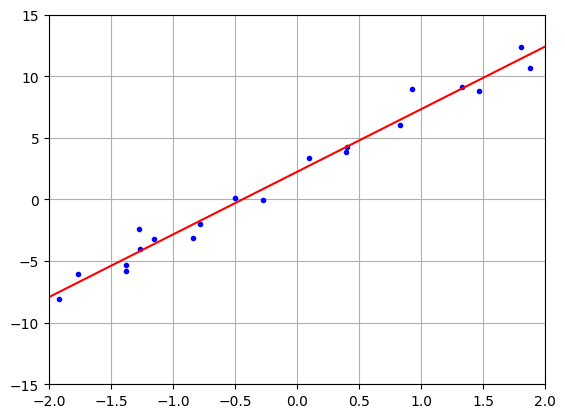

In [8]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))                 # 20 samples (each are 1D), we need the matrix to be 20 x 1 before passing it to the model
y_data = 5. * x_data + 2.5 + np.random.randn(20)                 

X = torch.tensor(x_data[:,np.newaxis], dtype=torch.float32)     # convert data to tensors
Y = torch.tensor(y_data[:,np.newaxis], dtype=torch.float32)

# Linear regression hypothesis using Pytorch
h = nn.Linear(1, 1, bias=True)                                  # h = w x + b
                                                                # in_features = 1 --> specifies the size of the input feature space (1 feature x so in_features = 1)

optimizer = optim.SGD(h.parameters(), lr = .1)                  # stochastic gradient descent with learning rate lr
                                                                # h.paramters() --> we're updating w0 and w1
Cost = nn.MSELoss() # mean squared error

for i in range(50):                                             # 50 epochs (epoch -- one complete pass through the training dataset)
    optimizer.zero_grad()
    out = h(X)
    loss = Cost(out, Y)                                         # loss should decrease with each step
    loss.backward()
    optimizer.step()

plt.plot(x_data, y_data, 'b.')
x = torch.tensor(np.linspace(-2.0, 2.0, 100).reshape(-1,1), dtype=torch.float32)    # generate an arr of 100 equally-spaced pts between -2.0 & 2.0, reshape to one col, and convert to tensor 
                                                                                    # (see task2 did this example slightly differently)
y = h(x).detach().numpy()   # detach and convert tensor to NumPy
plt.plot(x,y,'r')
plt.ylim([-15, 15])
plt.xlim([-2, 2])
plt.grid('on')

## Non-Linear Example

We will design a 2-Hidden layers Neural Network to predict the following data

Epoch [500/10000], Loss: 21.5521
Epoch [1000/10000], Loss: 6.1377
Epoch [1500/10000], Loss: 4.4687
Epoch [2000/10000], Loss: 3.8107
Epoch [2500/10000], Loss: 3.0445
Epoch [3000/10000], Loss: 2.9134
Epoch [3500/10000], Loss: 2.5641
Epoch [4000/10000], Loss: 2.5502
Epoch [4500/10000], Loss: 2.2456
Epoch [5000/10000], Loss: 2.1306
Epoch [5500/10000], Loss: 1.9391
Epoch [6000/10000], Loss: 1.8814
Epoch [6500/10000], Loss: 1.8142
Epoch [7000/10000], Loss: 1.7577
Epoch [7500/10000], Loss: 1.6940
Epoch [8000/10000], Loss: 1.6639
Epoch [8500/10000], Loss: 1.7978
Epoch [9000/10000], Loss: 1.7284
Epoch [9500/10000], Loss: 1.6496
Epoch [10000/10000], Loss: 1.6135


Text(0.5, 1.0, 'Synthetic data')

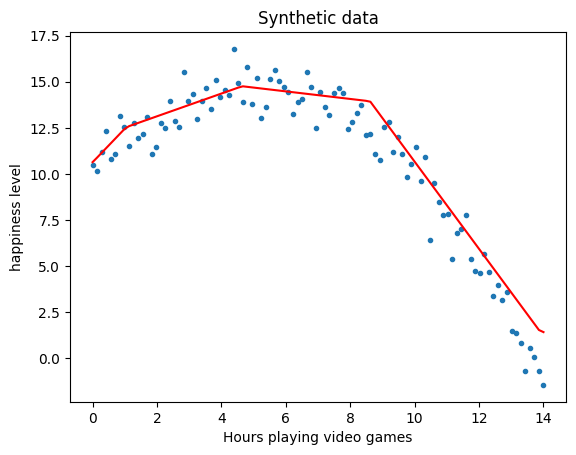

In [9]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1)          # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness

# Define a neural network
#       2 hidden layers; each will have 6 neurons (for each neuron, we have a bias term), use ReLU for the function g in the hidden layers

class MyModel(nn.Module):                               # nn.Module --> parent class
    def __init__(self):
        super(MyModel, self).__init__()

        # define the three layers
        self.layer1 = nn.Linear(1, 6, bias=True)        # Input to hidden layer    (input = 1, 6 outputs()  
        self.layer2 = nn.Linear(6, 6)                   # input = the 6 outputs from the previous layers, 6 output 
        self.layer3 = nn.Linear(6, 1)                   # Hidden layer to output   (6 inputs, 1 output)

    def forward(self, x):                               # override the forward method of nn.Module
        x = torch.relu(self.layer1(x))                  # applying non-linearity
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)                              # we want negative outputs in the last layer, don't use relu
        return x

# Instantiate the model, define loss function, and optimizer
model = MyModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    # Compute the loss
    loss = criterion(y_pred, y)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


## Plot the results
plt.plot(x,y, '.')
out = model(x)
plt.plot(x,out.detach().numpy(), 'r')
plt.xlabel('Hours playing video games')
plt.ylabel('happiness level')
plt.title('Synthetic data')

# MNIST Image Classification
### 1.  Loading the MNIST dataset

In [6]:
training_data = datasets.MNIST(
    root='~/Downloads/',
    train=True,
    download=True,
    transform=transforms.Compose([
              transforms.ToTensor()])
              #transforms.Normalize((0.1307,), (0.3081,))])
) 
                # download MNIST dataset, save it in the Downloads folder, we only want to get the training part
                # download = True --> download if it doesn't exist
                # transforms.ToTensor() --> convert each image in the PIL data type to Tensor
                # if you want to apply Gaussian Blur, flip the image, do some data augmentation --> all can be specified here

test_data = datasets.MNIST(
    root='~/Downloads/',
    train=False,
    download=True,
    transform=ToTensor()
)

content = """
The data is contained in the ```training_data.data``` and the labels
in ```training_data.targets```.

You can also access the data using indexing ```training_data[index]```

The ```Dataset``` retrieves our dataset’s features and labels one sample at a time. While training a model, 
we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting

```DataLoader``` is an iterable that abstracts this complexity for us in an easy API.

```train_features, train_labels = next(iter(train_dataloader))```

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
"""

batchsize = 64
train_dataloader = DataLoader(training_data, batch_size=batchsize, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

Markdown(content)


The data is contained in the ```training_data.data``` and the labels
in ```training_data.targets```.

You can also access the data using indexing ```training_data[index]```

The ```Dataset``` retrieves our dataset’s features and labels one sample at a time. While training a model, 
we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting

```DataLoader``` is an iterable that abstracts this complexity for us in an easy API.

```train_features, train_labels = next(iter(train_dataloader))```

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)


In [7]:
training_data[0][0]         # get X (image) of index 0
training_data[0][1]         # get Y (label) of index 0

5

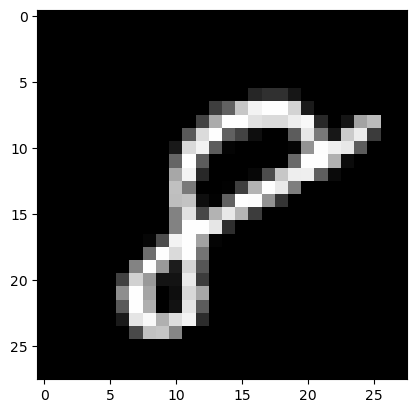

In [8]:
type(training_data[0])                                             # output --> tuple (x & y)
                                                                   #            x -- image, y -- label
training_data[0][0].shape                                          # output --> torch.Size([1, 28, 28]) -- 1 sample, image is 28 x 28
                                                                   #            if it was an RGB image, the output would be torch.Size([1, 3, 28, 28])
plt.imshow(training_data[59999][0][0, :, :], cmap = 'gray')        # [0, :, :] --> need to give plt (28 x 28) and not (1 x 28 x 28) 
                                                                   # so we specify the first element as 0

In [9]:
data = next(iter(train_dataloader))     # make an iteration out of train_dataloader, we want to get the next batch of 64 images

In [10]:
len(data[0])                            # output: 64 --> number of samples
data[0].shape                           # output: torch.Size([64, 1, 28, 28]) --> 64 images, each image is 1 x 28 x 28
data[0].reshape(64, -1).shape           # output: torch.Size([64, 784]) --> need them in one feature vector to be fed into the neural network (vectorize the image)
                                        #                                   can also use view(), which does the same thing as reshape
                                        #                                   view() is better because it's in-place, reshape allocates extra space for the data

torch.Size([64, 784])

### 2.  Create a multiclass logistic regression (softmax) model and train

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class mnistClassifier(nn.Module):                       # image is 28 x 28 pixels -- total number of features = 784
                                                        # I want to get probability values -- e.g., P( y = 0 | x )
    def __init__(self):
        super(mnistClassifier, self).__init__()

        # define the neural network
        self.layer1 = nn.Linear(784, 10, bias=True)     # input is the 784 feature vectors, 10 outputs
        self.prob = nn.LogSoftmax(dim=1)                # we want to have stable training, we don't want to use division
                                                        # dim = 1 --> dim 1 of the input tensor, which corresponds to the output features of the nn
                                                        # either do it here as a layer or do it in the forward function 

    def forward(self, x):
        # x = self.prob(self.layer1(x))
        x = torch.log_softmax(self.layer1(x), dim=1)
        return x
        
hypothesis = mnistClassifier()

optimizer = optim.SGD(hypothesis.parameters(), lr = .001)   # stochastic gradient descent with learning rate lr
Cost = nn.NLLLoss()                                         # Negative log likelihood loss

J_history = []
for epoch in range(10):                             # pass through the dataset 1000 times, but we're doing it in a batch of 64
    running_loss = 0
    for i, data in enumerate(train_dataloader):
        
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        inputs = inputs.reshape(inputs.shape[0],-1)
        
        optimizer.zero_grad()
        # forward pass
        out = hypothesis(inputs)

        loss = Cost(out, labels)

        # backward pass
        loss.backward()

        # update paramters
        optimizer.step()

        
        running_loss += loss.item()
        
        if i%300 == 0:
            print(f'Epoch {epoch+1}:{i+1} Loss: {loss.item()}')
            
    J_history += [running_loss]

Epoch 1:1 Loss: 2.3546245098114014
Epoch 1:301 Loss: 2.019240140914917
Epoch 1:601 Loss: 1.7482268810272217
Epoch 1:901 Loss: 1.671295166015625
Epoch 2:1 Loss: 1.5479965209960938
Epoch 2:301 Loss: 1.4216547012329102
Epoch 2:601 Loss: 1.3708845376968384
Epoch 2:901 Loss: 1.2654904127120972
Epoch 3:1 Loss: 1.311782956123352
Epoch 3:301 Loss: 1.2261075973510742
Epoch 3:601 Loss: 1.17709219455719
Epoch 3:901 Loss: 1.0769237279891968
Epoch 4:1 Loss: 1.1021281480789185
Epoch 4:301 Loss: 1.058032512664795
Epoch 4:601 Loss: 1.0870563983917236
Epoch 4:901 Loss: 0.8392415642738342
Epoch 5:1 Loss: 1.0305029153823853
Epoch 5:301 Loss: 0.7578621506690979
Epoch 5:601 Loss: 0.8968597650527954
Epoch 5:901 Loss: 0.7898155450820923
Epoch 6:1 Loss: 0.7672116160392761
Epoch 6:301 Loss: 0.9064183235168457
Epoch 6:601 Loss: 0.6934901475906372
Epoch 6:901 Loss: 0.7545101642608643
Epoch 7:1 Loss: 0.8090190291404724
Epoch 7:301 Loss: 0.8100811839103699
Epoch 7:601 Loss: 0.8539330959320068
Epoch 7:901 Loss: 0.6

### 3. Plot Convergence plot of gradient descent with respect to no of epochs

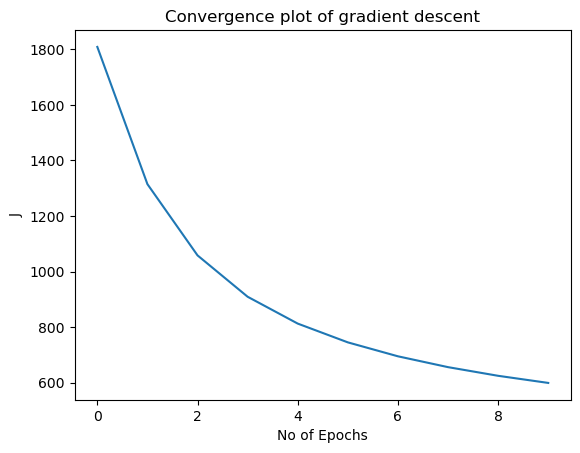

In [12]:
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.title('Convergence plot of gradient descent')
plt.xlabel('No of Epochs')
plt.ylabel('J')
plt.show()

### 4. Test on a batch of test images and display images with the predicted label

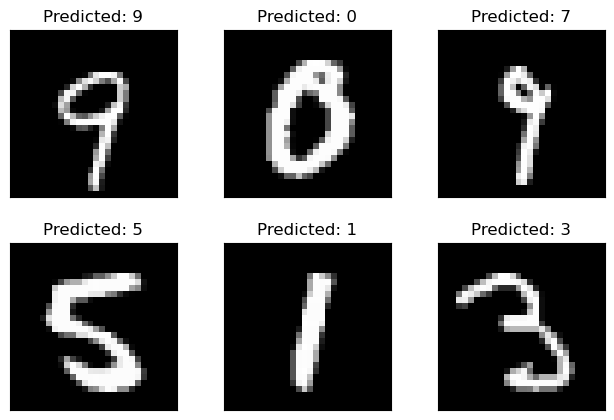

In [14]:
# test on one batch of test data
inputs_im, labels =  next(iter(test_dataloader))        
inputs = inputs_im.to(device)
labels = labels.to(device)
inputs = inputs.reshape(inputs.shape[0],-1)         # reshapes input data into a 2D tensor; each row represents a sample & each col represents a feature
out = hypothesis(inputs)
pr = torch.argmax(out, dim=1)                       # predicted labels
                                                    # computes the predicted labels by taking the index of the maximum value along 
                                                    # dimension 1 of the output tensor out 
                                                    # This essentially finds the class with the highest probability for each sample

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    im = torch.squeeze(inputs_im[i].detach(), dim=0).numpy()    # convert the images to a NumPy array
    plt.imshow(im, cmap='gray', interpolation='none')
    plt.title("Predicted: {}".format(pr[i]))
    plt.xticks([])
    plt.yticks([])